# Daimond price prediction

Data Science Objective- I need to build a model which predicts, with a high-level accuracy, the market price in US dollars of a diamond by relating the prices of De Beers diamonds which were sold to their features. Since, I want my model to be as accurate as possible, I will optimize the mean absolute error on the testing set (which is a metric for accuracy) instead of the R² (i.e., the coefficient of determination) regression score on the testing set (which is a metric of precision).

# Data Understanding

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
#dataset
df = pd.read_csv("Diamonds Prices2022.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


Main features:

carat (carat weight of the diamond)

cut (cut quality of the cut)

color (color diamond color)

clarity (clarity a measurement of how clear the diamond is)

x (length in mm)

y (width in mm)

z (depth in mm)

depth (total depth percentage = z / mean(x, y))

table (width of top of diamond relative to widest point)

# Data analysis

In [4]:
df.shape

(53943, 11)

In [5]:
df.isna().sum().sum()

0

In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
df=df.drop(["Unnamed: 0"],axis=1)

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
carat      53943 non-null float64
cut        53943 non-null object
color      53943 non-null object
clarity    53943 non-null object
depth      53943 non-null float64
table      53943 non-null float64
price      53943 non-null int64
x          53943 non-null float64
y          53943 non-null float64
z          53943 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
#in the above output,at "min" row we get x,y,z values are zeroes,which is not possible(because x,y,z are cannot be zero)
#so we have to remove like values(which are also said to be as an outliers)

Min value of "x","y","z" are zeroes this indicates that there are faulty values(outliers)in data that represent dimentionless or 2-dimenstional daimonds.so we need to filter out those as it clearly faulty data points

In [12]:
#Dropping dimentionless daimonds
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)


In [13]:
df.shape #lesser than previous size
            #We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

(53923, 10)

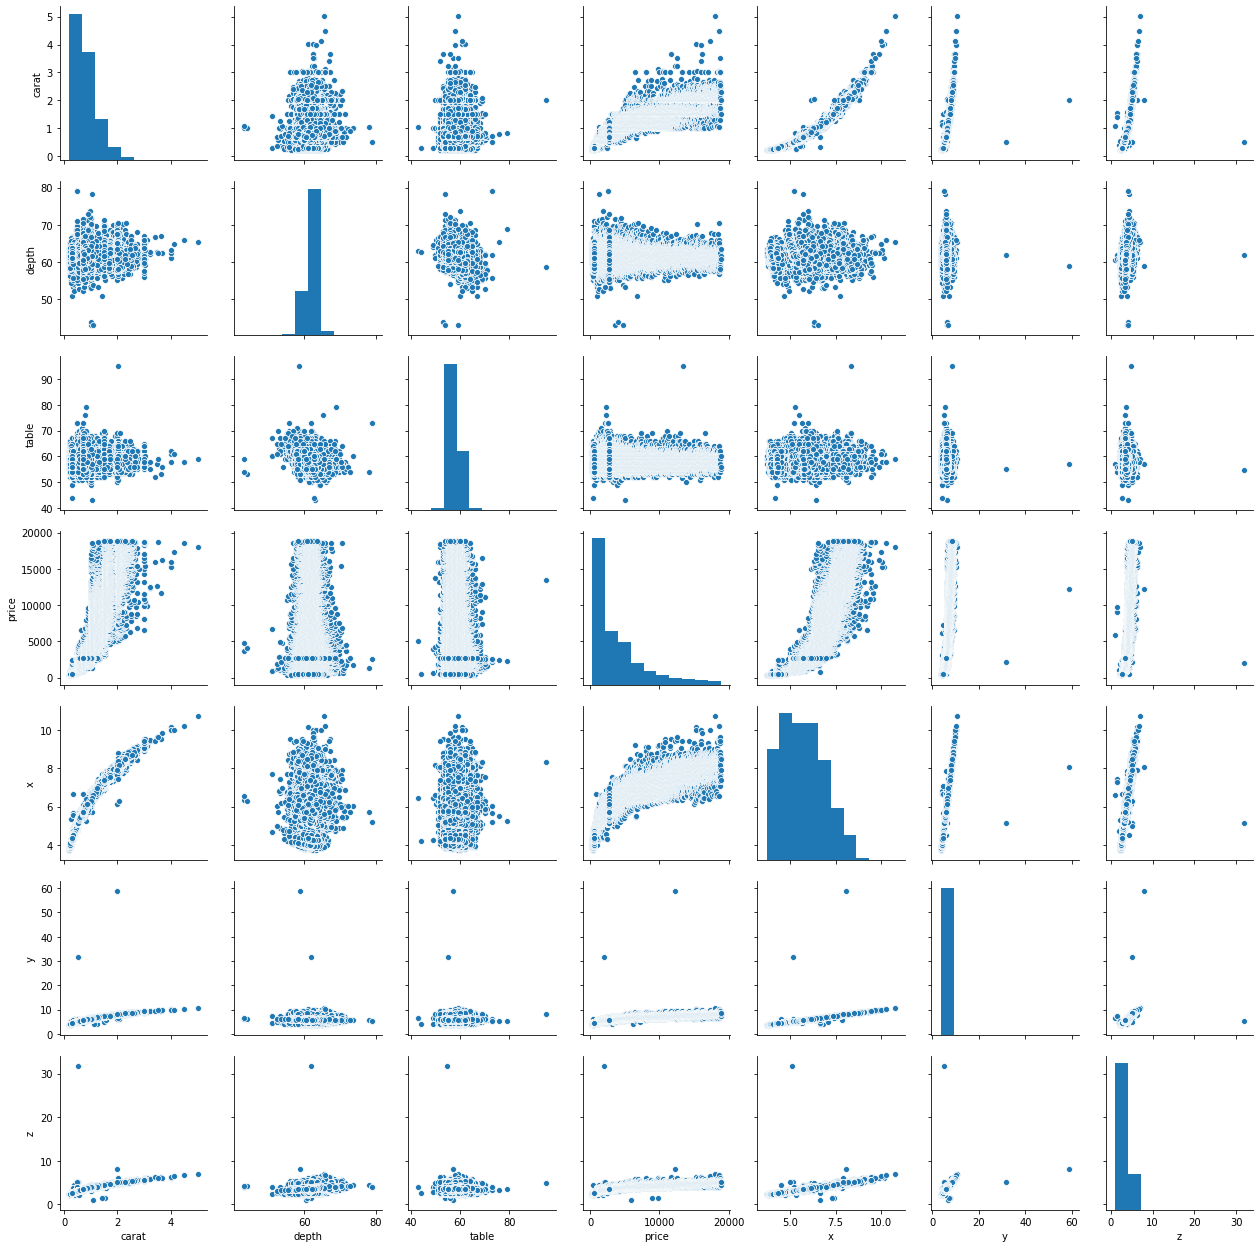

In [14]:
ax = sb.pairplot(df,palette="inferno")  #without hue attribute 
                                            #its very difficult to identify the out laiyers

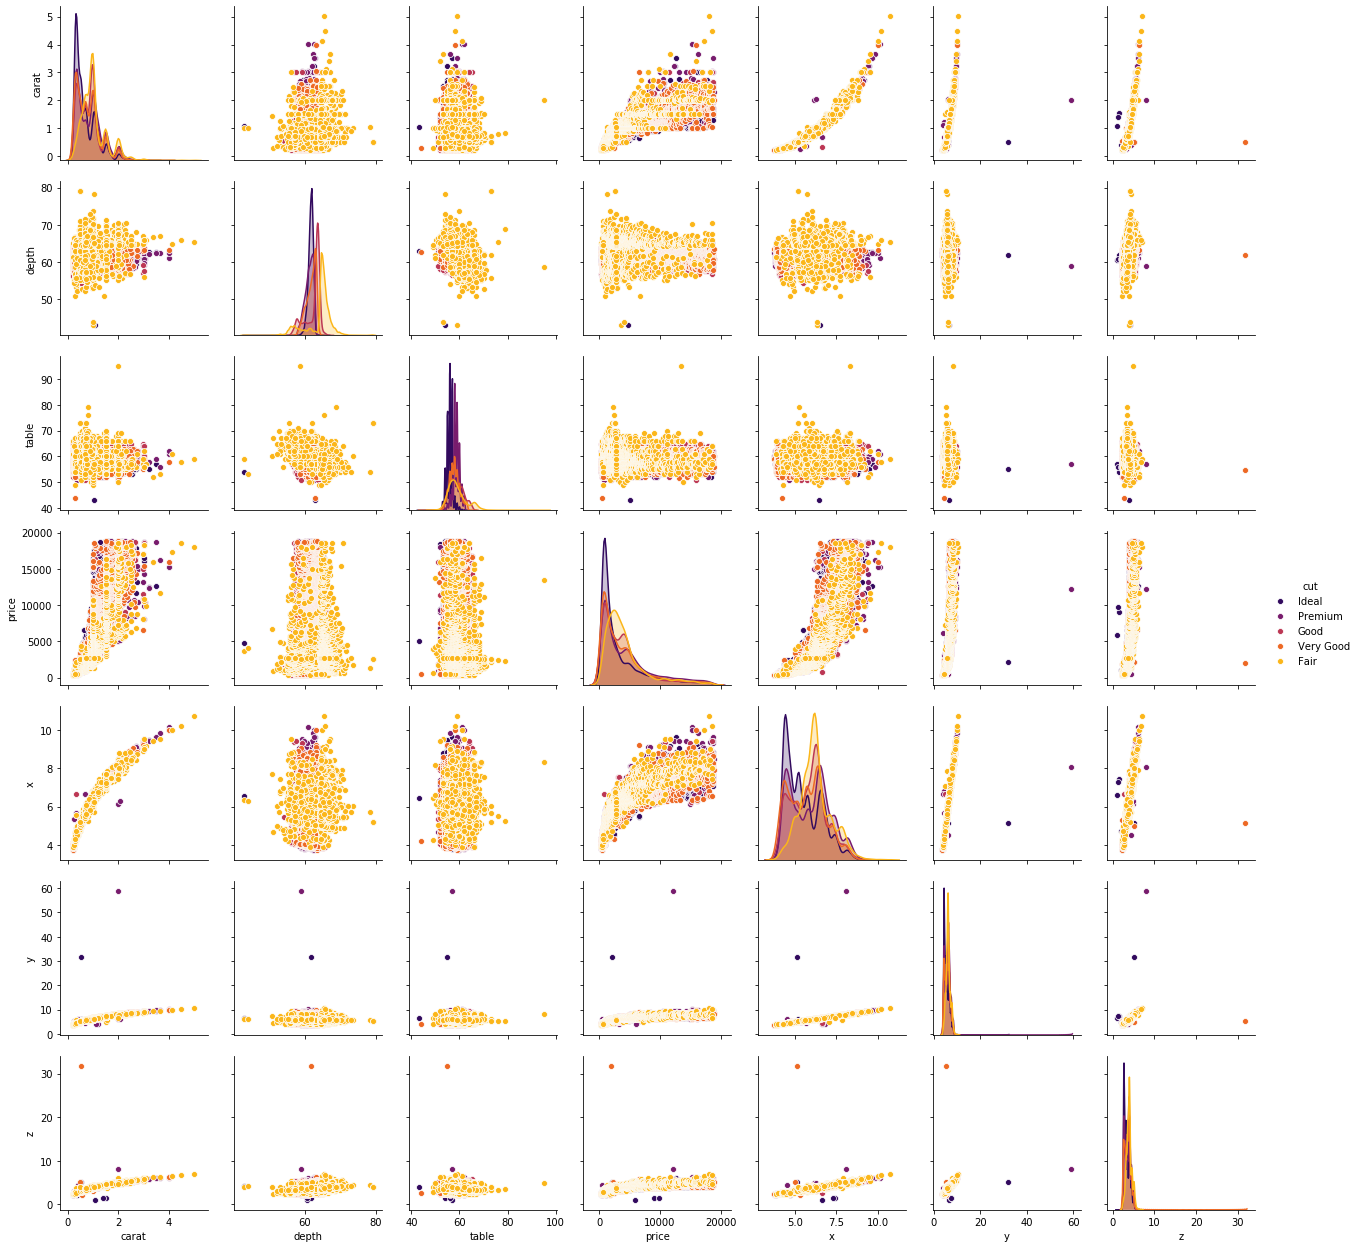

In [15]:
#plotting the data in pair plot where we get clear relations between every column
ax = sb.pairplot(df, hue= "cut",palette="inferno") 
                                            #inferno is an inbuild palette

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated. "depth","table" also have some outliers to remove

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

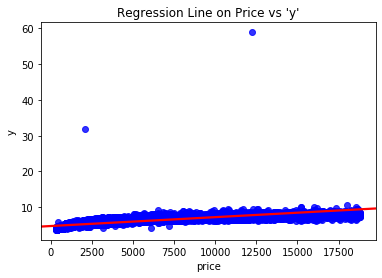

In [16]:
# look at regression plots to get a close look at the outliers.
ax = sb.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs 'y'")
#observing the plot,we find that after 30 we ingnore the points(outliers)....
#we don't take points above 30,therefore 30 is the boundary line

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

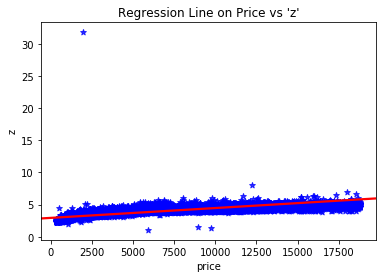

In [17]:
ax= sb.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"},marker="*")
ax.set_title("Regression Line on Price vs 'z'")

#i can consider any boundary(12,15,20,....)clearly observed in graph

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

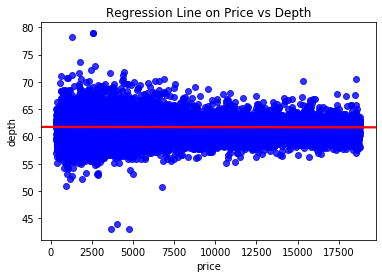

In [18]:
ax= sb.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Depth")


#i an take 75 as first boundary and 45 as my second boundary (outliers)

Text(0.5, 1.0, 'Regression Line on Price vs Table')

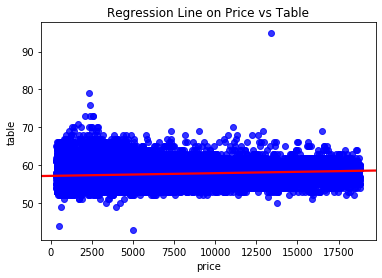

In [19]:
ax=sb.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Table")

#i can take 75,80 as my first boundary line and 50 or 45 as my second boundary line



In [20]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53910, 10)

we have removed regression outliers, let us have a look at the pair plot of data in our hand.

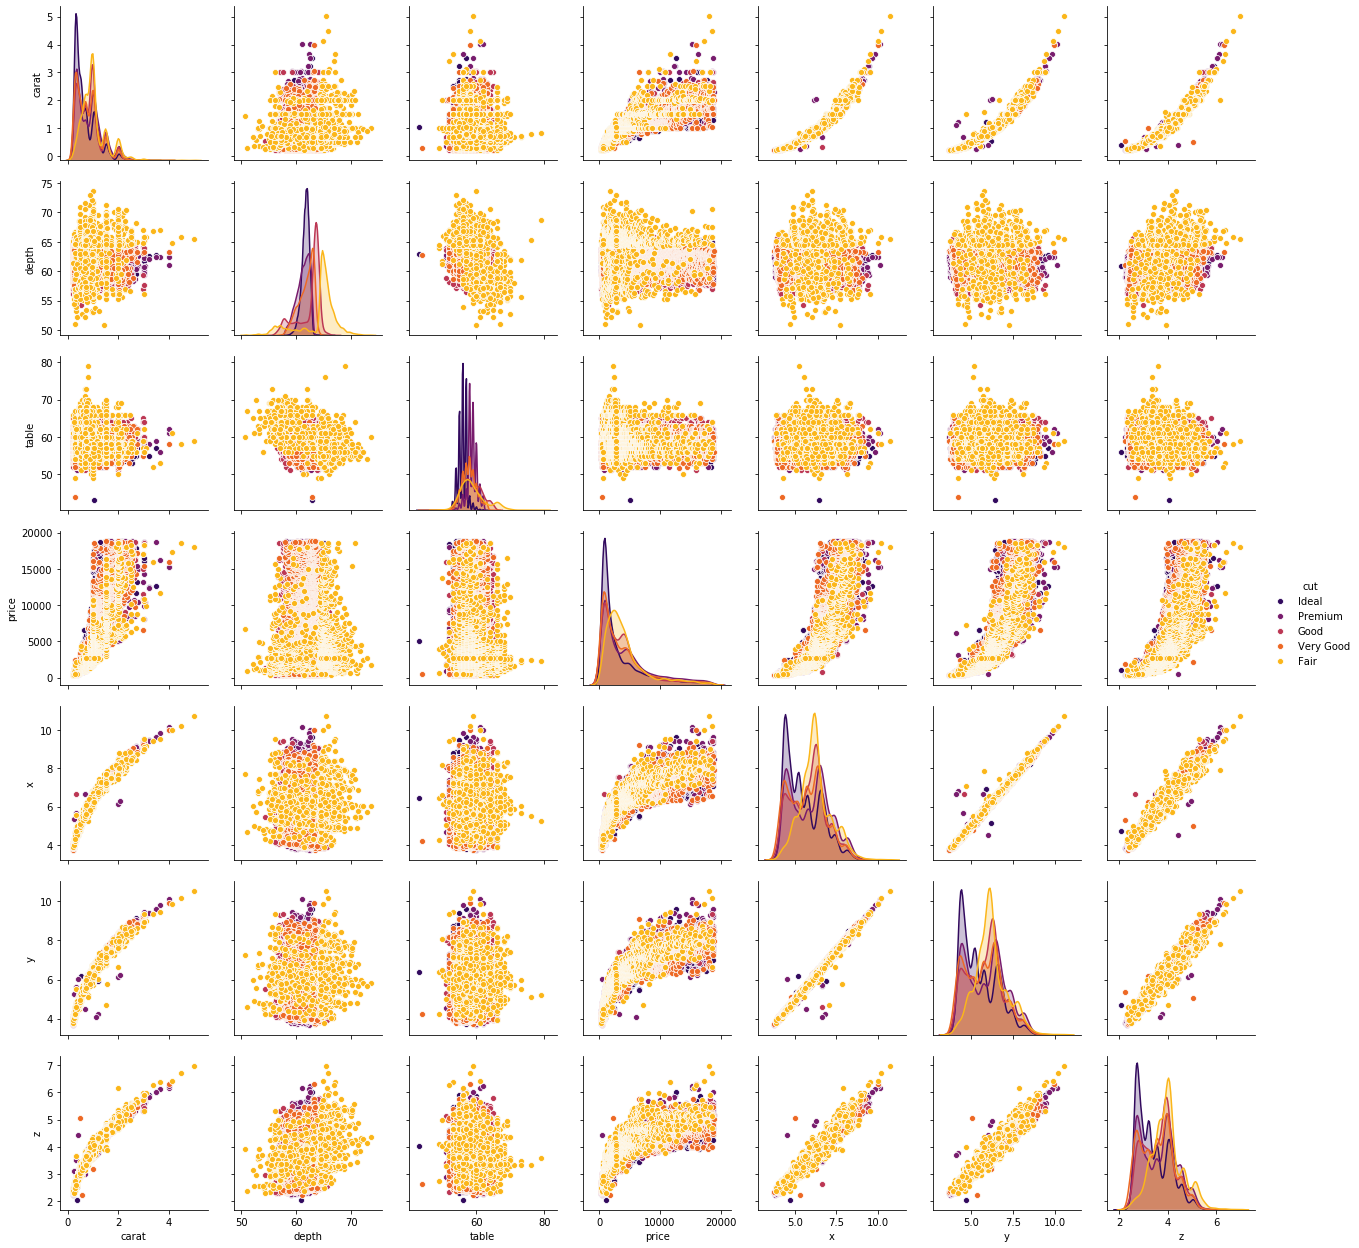

In [21]:
ax = sb.pairplot(df, hue= "cut",palette="inferno")

In [22]:
df["vol"] = df.x * df.y * df.z
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [23]:
df.drop(["x","y","z"], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


# we will deal with the categorical variables


Create dummy variables

In [24]:
# Getting list of categorical variables
s =( df.dtypes =="object")
s

carat      False
cut         True
color       True
clarity     True
depth      False
table      False
price      False
vol        False
dtype: bool

In [25]:
cols = list(s[s].index)
print("Categorical variables:")
print(cols)

Categorical variables:
['cut', 'color', 'clarity']


In [26]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [27]:
df.cut.replace({"Ideal":5, "Premium":4, "Good":2,"Very Good":3,"Fair":1}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,E,SI2,61.5,55.0,326,38.202030
1,0.21,4,E,SI1,59.8,61.0,326,34.505856
2,0.23,2,E,VS1,56.9,65.0,327,38.076885
3,0.29,4,I,VS2,62.4,58.0,334,46.724580
4,0.31,2,J,SI2,63.3,58.0,335,51.917250


In [28]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [29]:
df.color.replace({"E":2, "I":6, "J":7, "H":5, "F":3, "G":4, "D":1}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,2,SI2,61.5,55.0,326,38.202030
1,0.21,4,2,SI1,59.8,61.0,326,34.505856
2,0.23,2,2,VS1,56.9,65.0,327,38.076885
3,0.29,4,6,VS2,62.4,58.0,334,46.724580
4,0.31,2,7,SI2,63.3,58.0,335,51.917250


In [30]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [31]:
df.clarity.replace({"SI2":1, "SI1":2, "VS1":3, "VS2":4, "VVS2":5, "VVS1":6, "I1":7,"IF":8}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,2,1,61.5,55.0,326,38.202030
1,0.21,4,2,2,59.8,61.0,326,34.505856
2,0.23,2,2,3,56.9,65.0,327,38.076885
3,0.29,4,6,4,62.4,58.0,334,46.724580
4,0.31,2,7,1,63.3,58.0,335,51.917250


# Splitting to Train and Test

In [32]:
X = df.drop(['price'], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.23,5,2,1,61.5,55.0,38.202030
1,0.21,4,2,2,59.8,61.0,34.505856
2,0.23,2,2,3,56.9,65.0,38.076885
3,0.29,4,6,4,62.4,58.0,46.724580
4,0.31,2,7,1,63.3,58.0,51.917250


In [33]:
y = df["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modeling

1)I have trained 3 Machine Learning models (Linear Regression, Decision Tree Regressor and Random Forest Regressor) “out of the box”, meaning without changing the hyperparameters of each model.

2)For each model, I checked for Overfitting by comparing the R-squared of each model on the test set to the R-squared of that model on the train test.

3)For each model, I created a scatter plot of the true prices from the market versus the predicted price from the model.

The R squared on the training set is almost equal to the R squared on the test set. This is an indicative that our linear regression model is not overfitting and therefore generalizing well to new data.

R squared of the Linear Regressor on training set: 88.34%
R squared of the Linear Regressor on test set: 88.44%


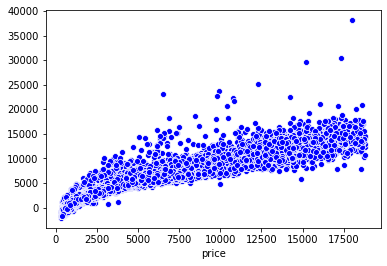

In [35]:
import sklearn.linear_model as sl
linreg=sl.LinearRegression()
linreg.fit(X_train,y_train)
print("R squared of the Linear Regressor on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regressor on test set: {:.2%}".format(linreg.score(X_test, y_test)))

y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")

In [36]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(tree.score(X_test, y_test)))


R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: 96.43%


The R squared on the training set is a bit higher than the R squared on the test set, but that doesn’t mean that our decision tree regressor model is overfitting. On the contrary, our decision tree regressor model is generalizing well to new data.

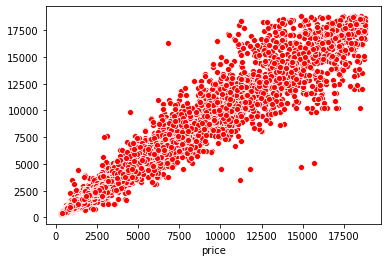

In [37]:
y_pred1 = tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred1, color="red")

In [38]:

import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.72%
R squared of the Random Forest Regressor on test set: 97.98%


The R squared on the training set is a bit higher than the R squared on the test set, but that doesn’t mean that our random forest regressor model is overfitting. On the contrary, our random forest regressor model is generalizing well to new data.

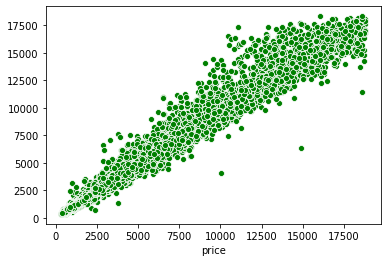

In [39]:
y_pred2 = rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred2, color="green")

# Evaluation

I checked the models MAE and MSLE scores on the test set.

In [40]:
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
9810,4669,6936.747326,2267.747326
20220,8653,10837.064332,2184.064332
37235,975,1408.073356,433.073356
25605,14474,11062.714245,-3411.285755
29982,716,580.031117,-135.968883
...,...,...,...
10165,4730,7652.729910,2922.729910
16594,6628,7781.360595,1153.360595
51700,2400,3343.007701,943.007701
14897,5998,5922.332573,-75.667427


In [41]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mae(y_test,y_pred1)))

Mean Absolute Error of the Linear Regression on test set is 362.60


Our linear regression model was able to predict the price of every diamond in the test set with an error of ± $362.60 of the real price.

In [42]:
d = {'true': y_test, 'predicted': y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt["diff"] = df_dt['predicted']-df_dt['true']
df_dt

,true,predicted,diff
9810,4669,5962.0,1293.0
20220,8653,12058.0,3405.0
37235,975,912.0,-63.0
25605,14474,13553.0,-921.0
29982,716,716.0,0.0
...,...,...,...
10165,4730,6405.0,1675.0
16594,6628,7291.0,663.0
51700,2400,2362.0,-38.0
14897,5998,5890.0,-108.0


In [43]:
print('Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}'.format(mae(y_test,y_pred1)))

Mean Absolute Error of the Decision Tree Regressor on test set is 362.60


Our decision tree regressor model was able to predict the price of every diamond in the test set with an error of ± $362.60 of the real price.

In [44]:
d = {"true": y_test,"predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf

,true,predicted,diff
9810,4669,5804.955000,1135.955000
20220,8653,11483.301071,2830.301071
37235,975,928.910500,-46.089500
25605,14474,13498.548333,-975.451667
29982,716,780.382500,64.382500
...,...,...,...
10165,4730,5977.465714,1247.465714
16594,6628,6612.737857,-15.262143
51700,2400,2679.376667,279.376667
14897,5998,5847.977500,-150.022500


In [45]:
print("\033[1m Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mae(y_test,y_pred2)))

 Mean Absolute Error of the Random Forest Regressor on test set is 285.06


Our random forest regressor model was able to predict the price of every diamond in the test set with an error of ± $285.06 of the real price.

Selected Model:
I chose the Random Forest Regressor model as the best model among the three, based on its MAE scores on the test set.

In [46]:
model = rf
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

So, our Random Forest model is a pretty good model for predicting the market price of a diamond. Now how do we predict the market price of a new diamond new diamond?

Suppose there is a new diamond which has: carat=0.23, cut=5 (Ideal), color=2 (E), clarity=1 (SI2), depth=61.5, table=55, vol=38.20 (x=3.95, y=3.98 and z=2.43).

In [47]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20]
prediction = rf.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $379.82


In [48]:
#carat	cut(1-5)-color(1-6)	clarity(1-8)	depth	tab le	vol
new_diamond = [0.5,3, 2, 1, 61.5, 55, 79]
prediction = rf.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $1107.73


In [49]:
new_diamond = [0.5,3, 3, 3, 80,55, 90]
prediction = rf.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $1806.35


In [56]:
new_diamond = [2.3,3, 4, 8, 80,55, 90]
prediction = rf.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $3756.80


In [ ]:
carats=input("enter Diamond carats: ")
cut=input("enter Diamond cut(1-5): ")
color=input("enter Diamond color(d1-j7): ")
clarity=input("enter Diamond clarity(1-8): ")
depth=input("enter Diamond depth: ")
table=input("enter Diamond table: ")
volume=input("enter Diamond volume: ")
new_daimond=[carats,cut,color,clarity,depth,table,volume]
prediction=0
print(new_daimond)
for i in new_diamond:
    if(i==0):
        print("Invalid input")
        break;
    else:
        prediction = rf.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))



In [ ]:
carats=input("enter Diamond carats: ")
cut=input("enter Diamond cut(1-5): ")
color=input("enter Diamond color(d1-j7): ")
clarity=input("enter Diamond clarity(1-8): ")
depth=input("enter Diamond depth: ")
table=input("enter Diamond table: ")
volume=input("enter Diamond volume: ")
new_daimond=[carats,cut,color,clarity,depth,table,volume]
prediction=0
print(new_daimond)
for i in new_diamond:
    if(i==0):
        print("Invalid input")
        break;
    else:
        prediction = rf.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))



new_diamond = [0.5,3, 2, 1, 61.5, 55, 79]